In [1]:
import sys
import os

# 현재 작업 디렉토리 확인
current_dir = os.getcwd()
print("Current directory:", current_dir)

# 프로젝트 루트 디렉토리를 Python 경로에 추가
project_root = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.append(project_root)

Current directory: /UHome/qtly_u/Predictive_Maintenance/image_preprocessing/image_processing


In [2]:
import os
import cv2
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams['font.family'] ='NanumGothic'
plt.rcParams['axes.unicode_minus'] =False
from func import func
import json
import ast
from skimage import feature

/tmp/ipykernel_16124/1902184488.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
origin_df = pd.read_csv("../dataset/df_0129_added_bbox.csv")
origin_df.columns

Index(['image_file', 'score', 'width', 'height', 'bbox_size', 'entropy',
       'laplacian', 'brightness', 'B_sd', 'red', 'blue', 'green', 'color_var',
       'contrast', 'img_size', 'edge_intensity', 'saturation', 'sift',
       'centroid_l', 'c_moment_x', 'c_moment_y', 'bbox_prop', 'ASM',
       'Contrast', 'Correlation', 'Variance', 'IDM', 'Sum_Average',
       'Sum_Variance', 'Sum_Entropy', 'Entropy', 'Difference_Variance',
       'Difference_Entropy', 'IMC1', 'IMC2', 'bbox'],
      dtype='object')

In [4]:
origin_df['image_id']= origin_df['image_file'].str[-16:-4].astype(int)

In [5]:
processed_df = pd.read_csv("processed_image.csv")
processed_df.columns

Index(['image_id', 'score', 'id', 'width', 'height', 'bbox_size', 'entropy',
       'laplacian', 'brightness', 'B_sd', 'red', 'blue', 'green', 'color_var',
       'contrast', 'img_size', 'edge_intensity', 'saturation', 'sift', 'psnr',
       'centroid_l', 'c_moment_x', 'c_moment_y', 'bbox_prop', 'ASM',
       'Contrast', 'Correlation', 'Variance', 'IDM', 'Sum_Average',
       'Sum_Variance', 'Sum_Entropy', 'Entropy', 'Difference_Variance',
       'Difference_Entropy', 'IMC1', 'IMC2'],
      dtype='object')

In [6]:
# 낮아진/높아진 이미지
with open('increased_id.json', 'r') as file:
    increased_id = json.load(file)
with open('decreased_id.json', 'r') as file:
    decreased_id = json.load(file)

In [7]:
len(increased_id)

2453

In [8]:
len(decreased_id)

3203

In [9]:
in_ori = origin_df[origin_df['image_id'].isin(increased_id)]
in_pro = processed_df[processed_df['image_id'].isin(increased_id)]

In [10]:
print(len(in_ori))
print(len(in_pro))

5137
5134


In [11]:
from collections import Counter

Count = Counter(in_pro['image_id'])
Count

Counter({380516: 4,
         478115: 9,
         89350: 3,
         357362: 8,
         493174: 12,
         272997: 3,
         338991: 2,
         187795: 10,
         159972: 5,
         385881: 5,
         536619: 5,
         437210: 8,
         551243: 3,
         495841: 7,
         377760: 3,
         335717: 2,
         532789: 6,
         456696: 6,
         4993: 4,
         221433: 9,
         259393: 11,
         38073: 3,
         512307: 4,
         390581: 12,
         319430: 5,
         313608: 3,
         279030: 6,
         154124: 8,
         72266: 6,
         416851: 4,
         467325: 1,
         540581: 3,
         96897: 4,
         367164: 3,
         336101: 5,
         501172: 10,
         442726: 11,
         144203: 2,
         500514: 9,
         172680: 3,
         490035: 5,
         109444: 5,
         361994: 3,
         205093: 2,
         153631: 4,
         364815: 5,
         119337: 11,
         326700: 3,
         258714: 5,
         370524: 2,

In [12]:
in_ori.columns

Index(['image_file', 'score', 'width', 'height', 'bbox_size', 'entropy',
       'laplacian', 'brightness', 'B_sd', 'red', 'blue', 'green', 'color_var',
       'contrast', 'img_size', 'edge_intensity', 'saturation', 'sift',
       'centroid_l', 'c_moment_x', 'c_moment_y', 'bbox_prop', 'ASM',
       'Contrast', 'Correlation', 'Variance', 'IDM', 'Sum_Average',
       'Sum_Variance', 'Sum_Entropy', 'Entropy', 'Difference_Variance',
       'Difference_Entropy', 'IMC1', 'IMC2', 'bbox', 'image_id'],
      dtype='object')

In [13]:
in_pro.columns

Index(['image_id', 'score', 'id', 'width', 'height', 'bbox_size', 'entropy',
       'laplacian', 'brightness', 'B_sd', 'red', 'blue', 'green', 'color_var',
       'contrast', 'img_size', 'edge_intensity', 'saturation', 'sift', 'psnr',
       'centroid_l', 'c_moment_x', 'c_moment_y', 'bbox_prop', 'ASM',
       'Contrast', 'Correlation', 'Variance', 'IDM', 'Sum_Average',
       'Sum_Variance', 'Sum_Entropy', 'Entropy', 'Difference_Variance',
       'Difference_Entropy', 'IMC1', 'IMC2'],
      dtype='object')

In [14]:
# 비교 제외대상 컬럼 선정
drop_columns = ['width','height','bbox_size','img_size','bbox_prop']

in_pro = in_pro.drop(columns = drop_columns)
in_ori = in_ori.drop(columns = drop_columns)

In [15]:
in_pro = in_pro.drop(columns='id')
in_ori = in_ori.drop(columns='bbox')

In [16]:
print(in_pro.columns)
print(in_ori.columns)

Index(['image_id', 'score', 'entropy', 'laplacian', 'brightness', 'B_sd',
       'red', 'blue', 'green', 'color_var', 'contrast', 'edge_intensity',
       'saturation', 'sift', 'psnr', 'centroid_l', 'c_moment_x', 'c_moment_y',
       'ASM', 'Contrast', 'Correlation', 'Variance', 'IDM', 'Sum_Average',
       'Sum_Variance', 'Sum_Entropy', 'Entropy', 'Difference_Variance',
       'Difference_Entropy', 'IMC1', 'IMC2'],
      dtype='object')
Index(['image_file', 'score', 'entropy', 'laplacian', 'brightness', 'B_sd',
       'red', 'blue', 'green', 'color_var', 'contrast', 'edge_intensity',
       'saturation', 'sift', 'centroid_l', 'c_moment_x', 'c_moment_y', 'ASM',
       'Contrast', 'Correlation', 'Variance', 'IDM', 'Sum_Average',
       'Sum_Variance', 'Sum_Entropy', 'Entropy', 'Difference_Variance',
       'Difference_Entropy', 'IMC1', 'IMC2', 'image_id'],
      dtype='object')


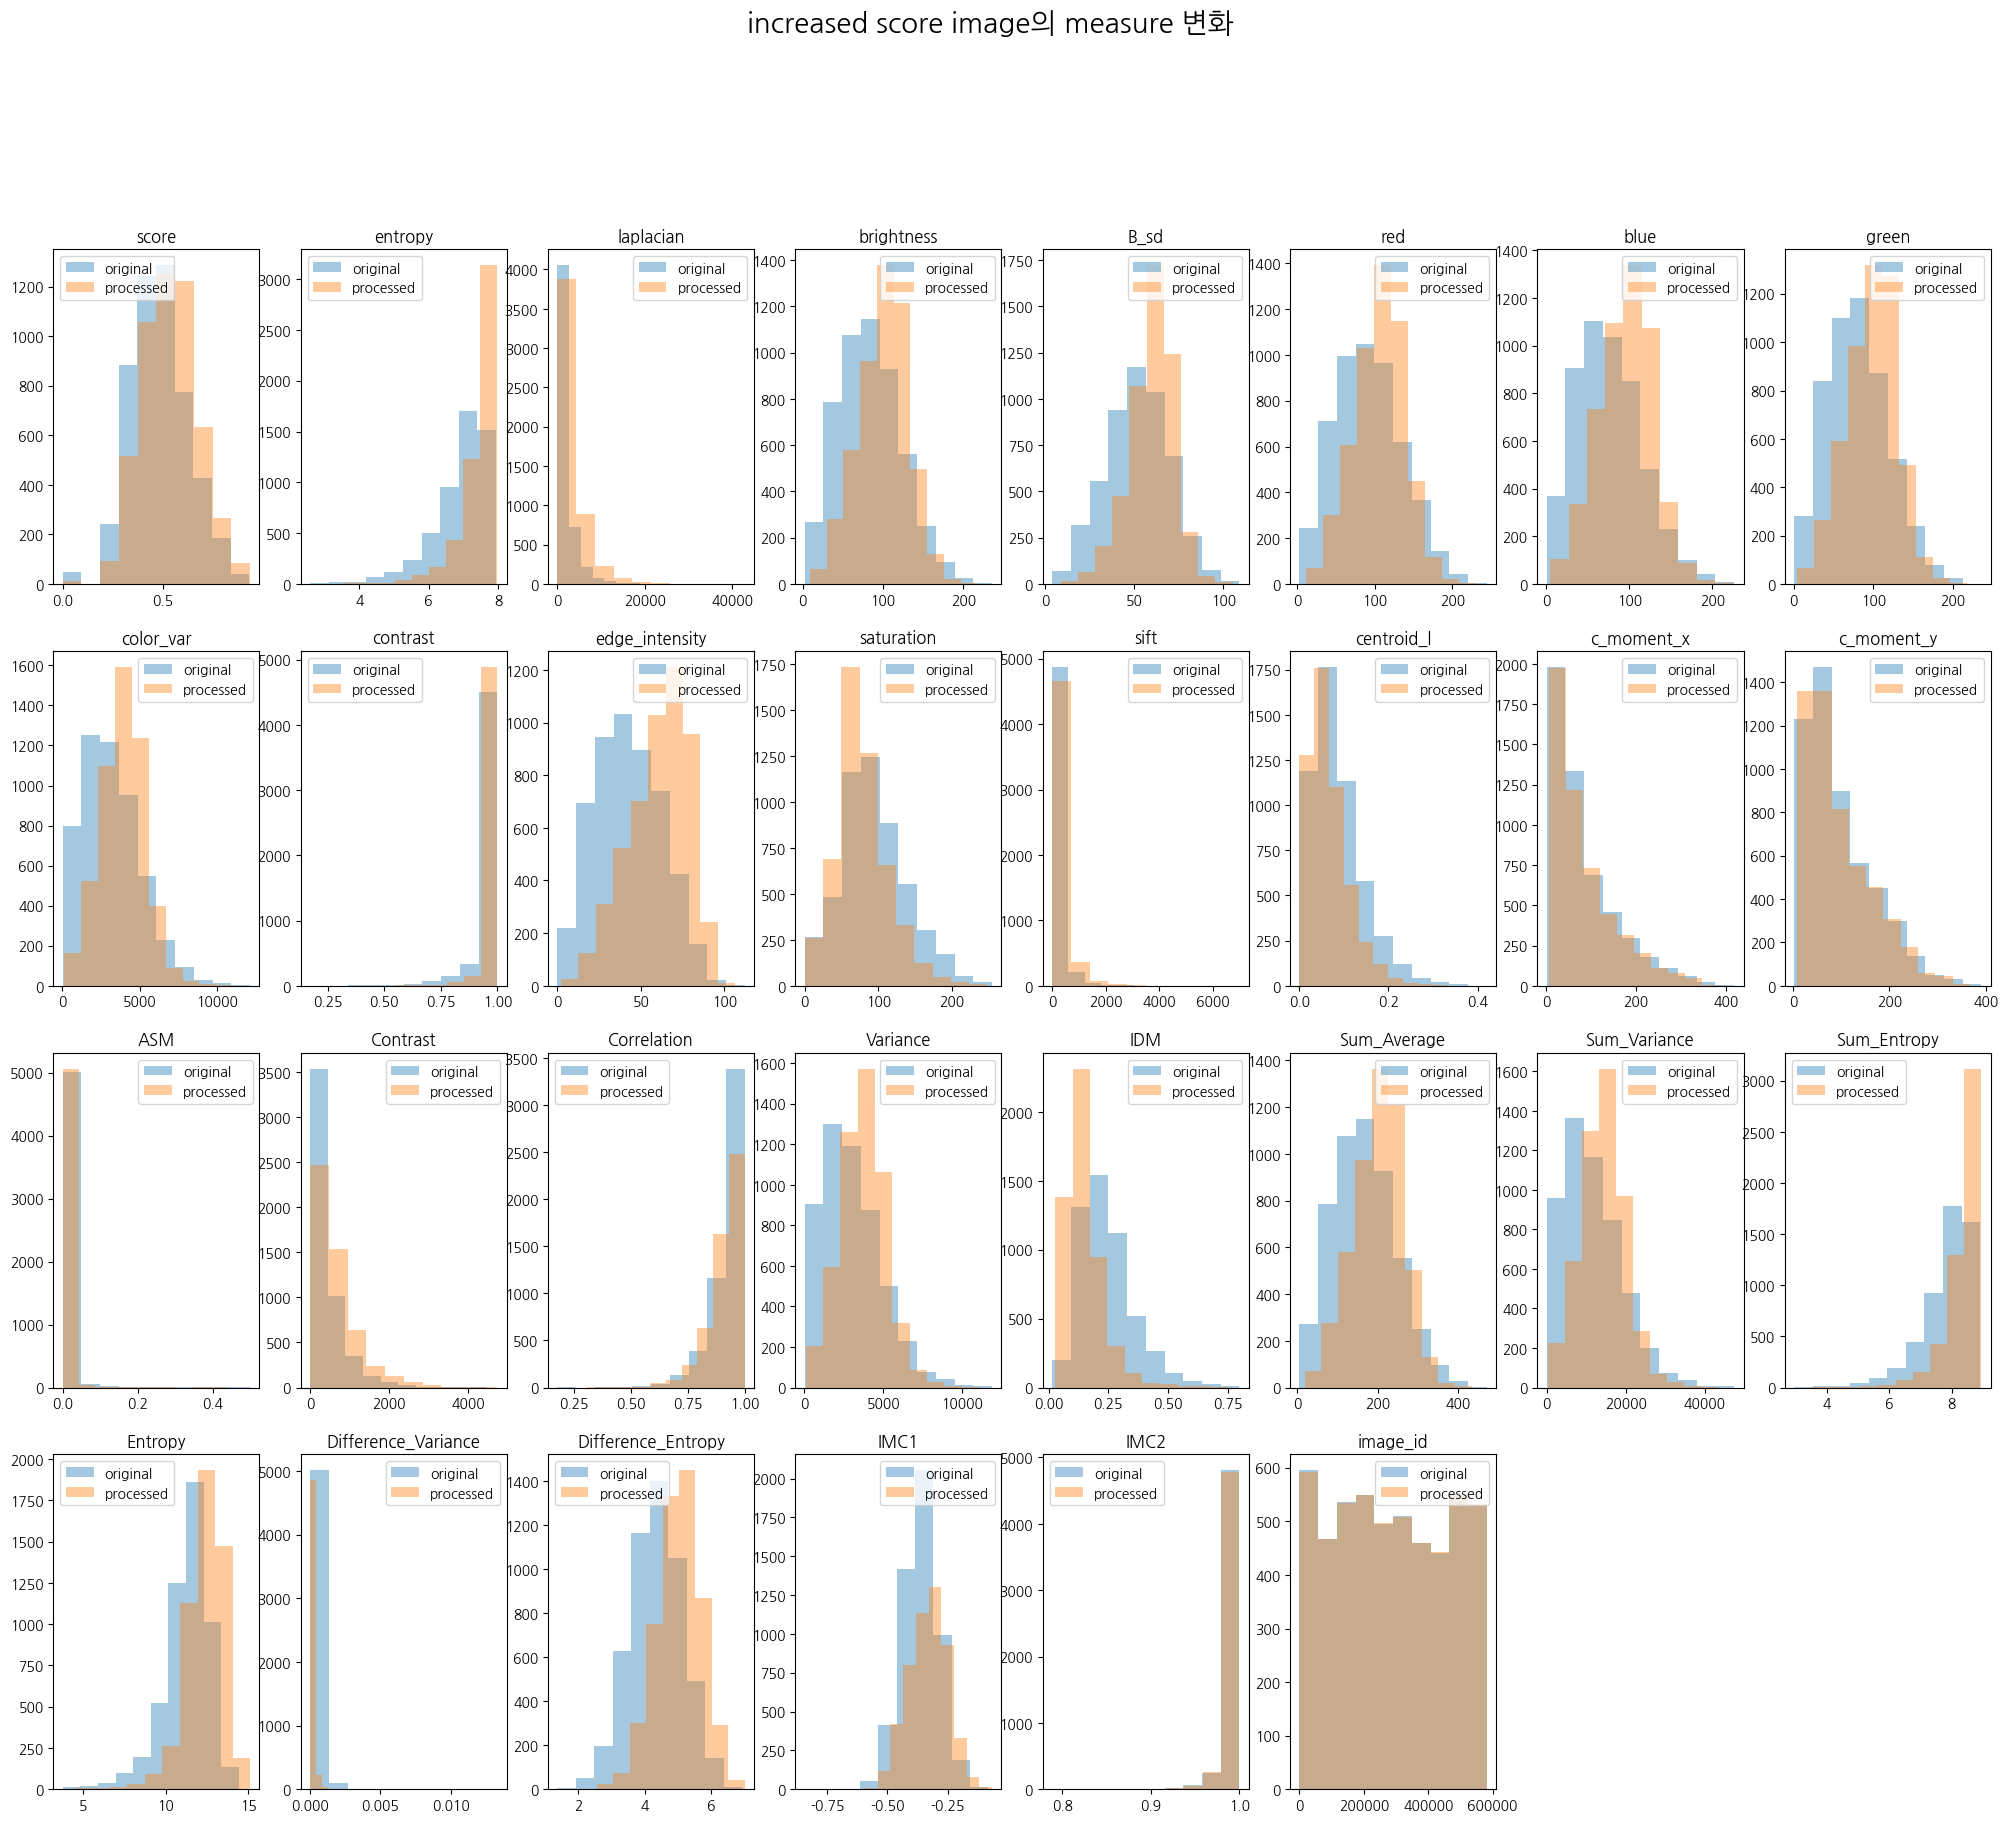

In [18]:
num_cols = in_ori.drop(columns='image_file', axis=1).shape[1]
num_per_row = 8

# 서브플롯의 행, 열 수 계산
num_rows = (num_cols + num_per_row - 1) // num_per_row

fig, axes = plt.subplots(nrows=num_rows, ncols=num_per_row, figsize=(25, num_rows * 5))

for i, column in enumerate(in_ori.drop(columns='image_file', axis=1).columns):
    row_idx = i // num_per_row
    col_idx = i % num_per_row
    axes[row_idx, col_idx].hist(in_ori[column], alpha=0.4, label='original')
    axes[row_idx, col_idx].hist(in_pro[column], alpha=0.4, label='processed')
    axes[row_idx, col_idx].set_title(column)

    # 각 서브플롯에 대해 범례 표시
    axes[row_idx, col_idx].legend()

# 빈 서브플롯 숨기기
for i in range(num_rows * num_per_row - num_cols):
    fig.delaxes(axes.flatten()[num_cols + i])

# 대표 제목 설정
fig.suptitle("increased score image의 measure 변화", y=1.0 , fontsize=20)

plt.show()

### decreased score 이미지 measure 변화

In [41]:
de_ori = origin_df[origin_df['image_id'].isin(decreased_id)]
de_pro = processed_df[processed_df['image_id'].isin(decreased_id)]
print(len(de_ori))
print(len(de_pro))

6605
6599


In [42]:
# 비교 제외대상 컬럼 선정
drop_columns = ['width','height','bbox_size','img_size','bbox_prop','image_id']

de_pro = de_pro.drop(columns = drop_columns)
de_ori = de_ori.drop(columns = drop_columns)

de_ori = de_ori.drop(columns='bbox')

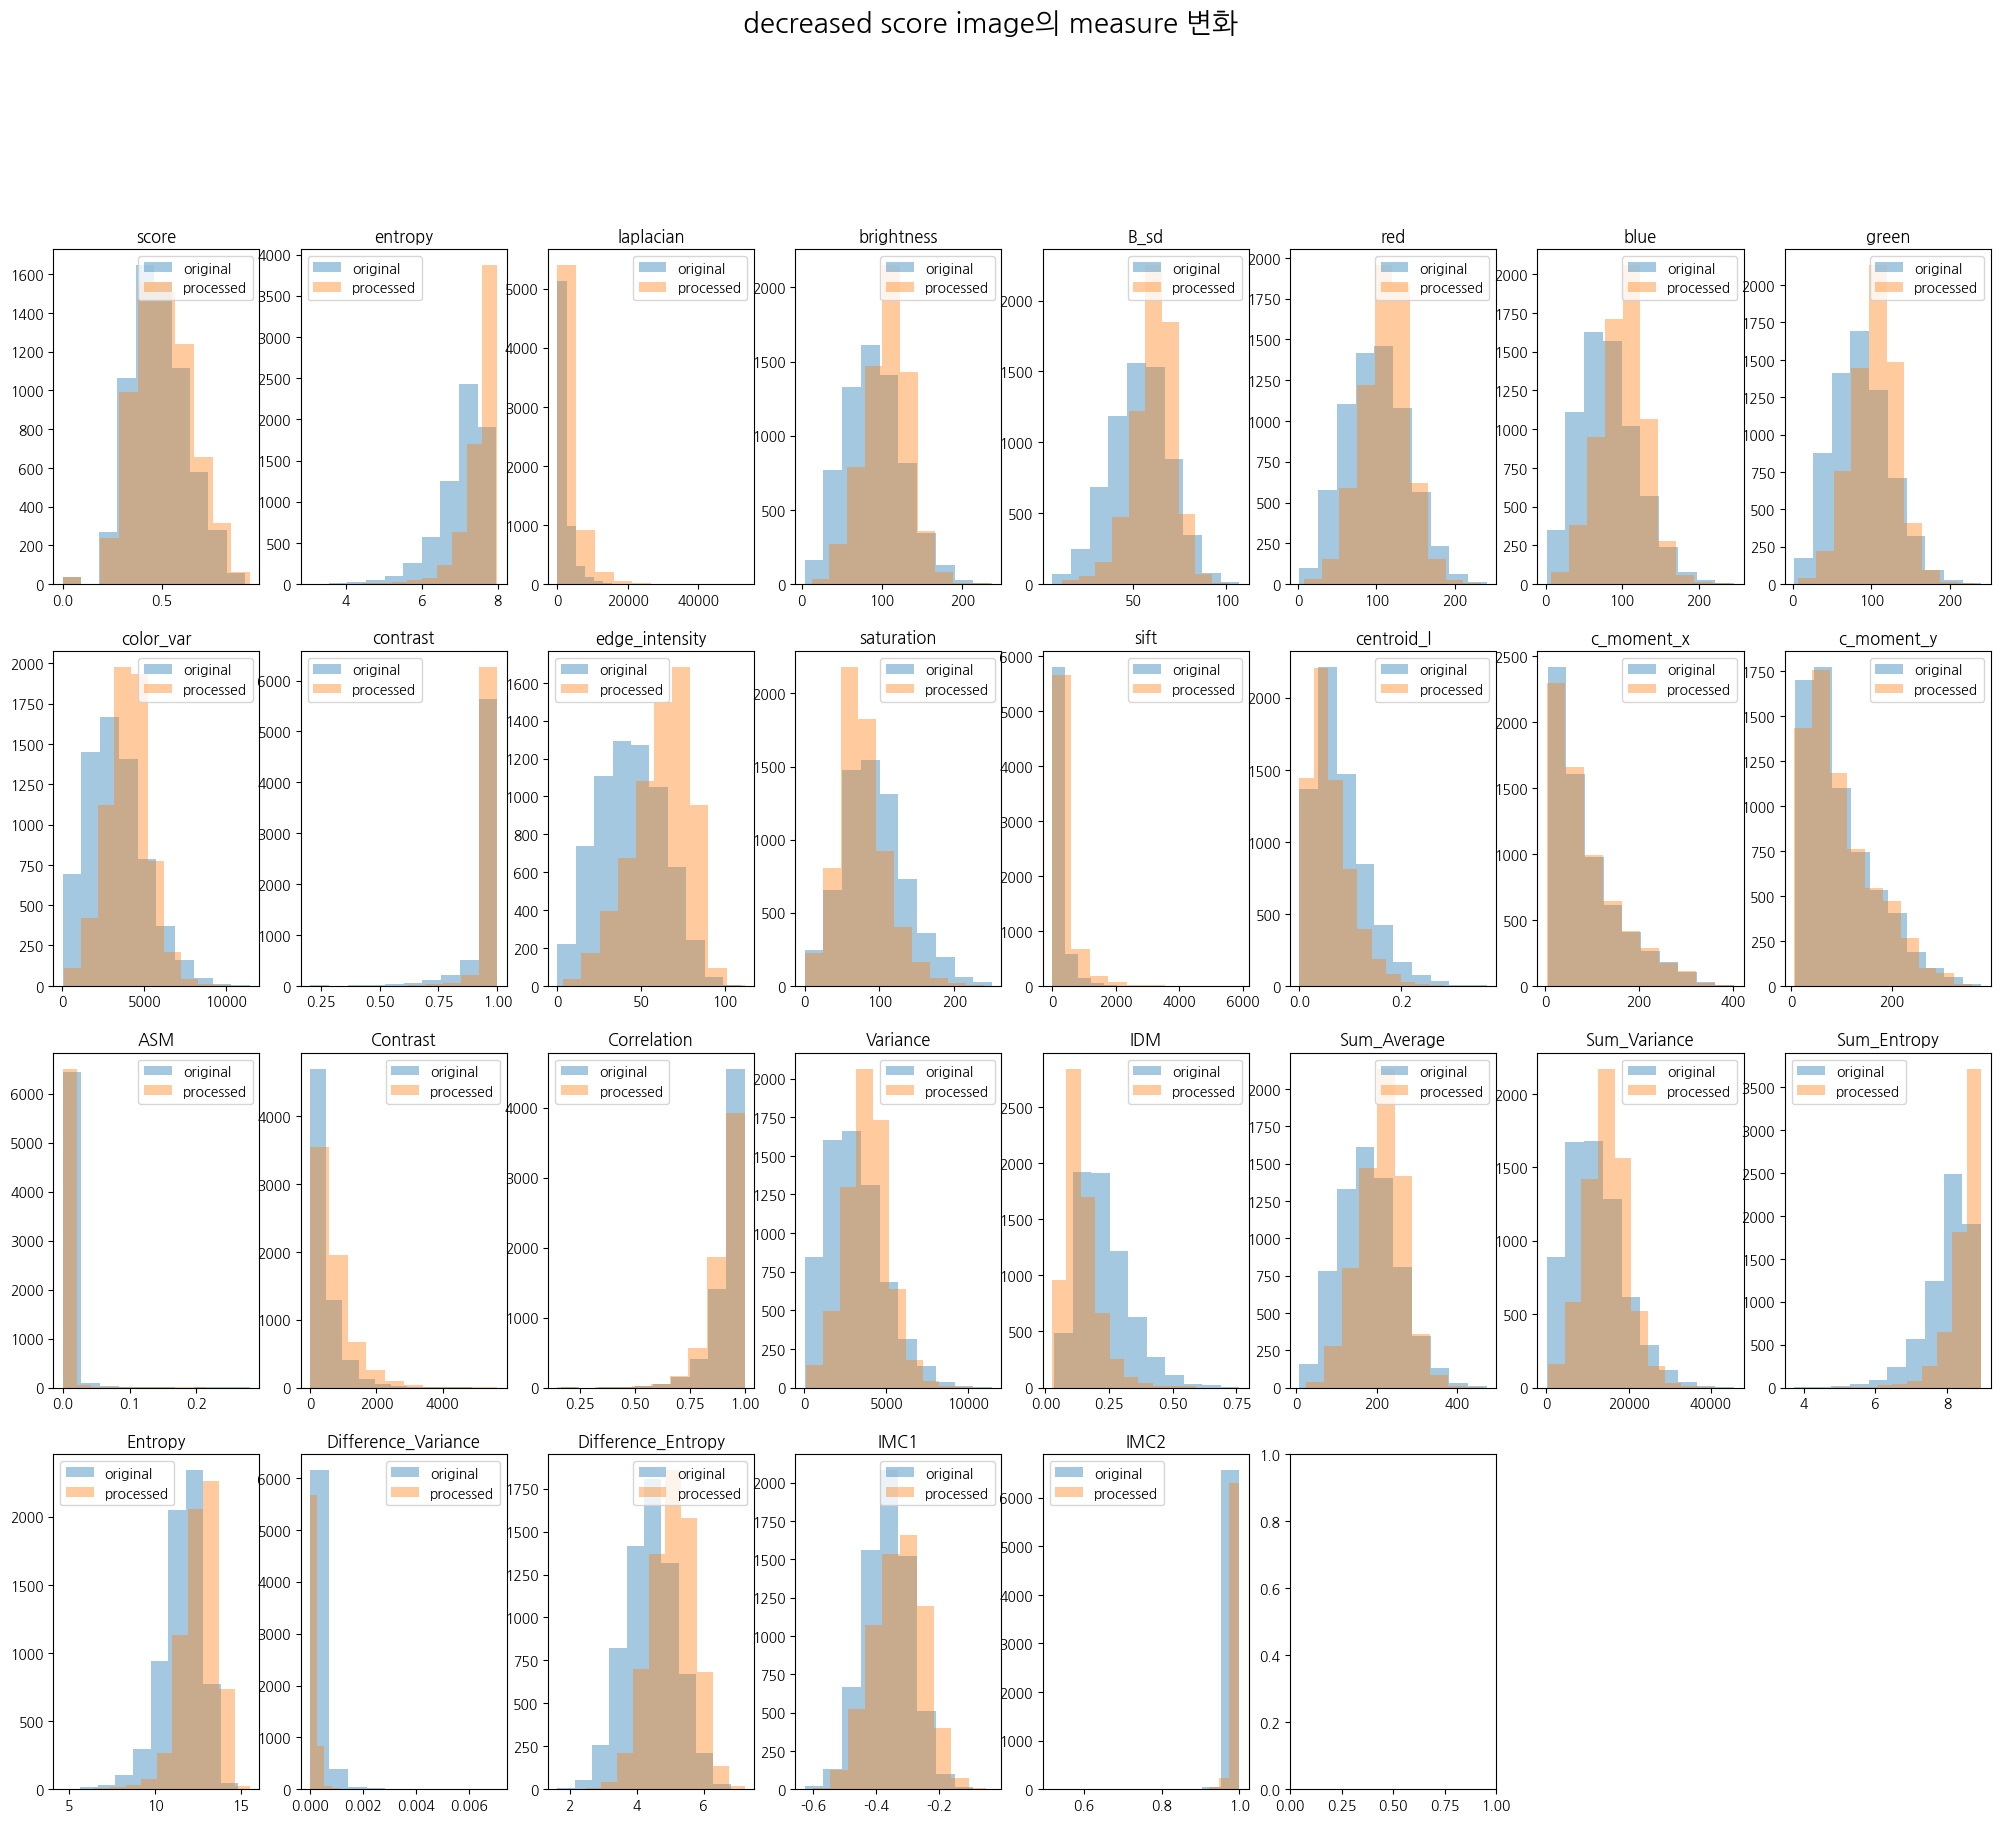

In [43]:
num_cols = in_ori.drop(columns='image_file', axis=1).shape[1]
num_per_row = 8

# 서브플롯의 행, 열 수 계산
num_rows = (num_cols + num_per_row - 1) // num_per_row

fig, axes = plt.subplots(nrows=num_rows, ncols=num_per_row, figsize=(25, num_rows * 5))

for i, column in enumerate(de_ori.drop(columns='image_file', axis=1).columns):
    row_idx = i // num_per_row
    col_idx = i % num_per_row
    axes[row_idx, col_idx].hist(de_ori[column], alpha=0.4, label='original')
    axes[row_idx, col_idx].hist(de_pro[column], alpha=0.4, label='processed')
    axes[row_idx, col_idx].set_title(column)

    # 각 서브플롯에 대해 범례 표시
    axes[row_idx, col_idx].legend()

# 빈 서브플롯 숨기기
for i in range(num_rows * num_per_row - num_cols):
    fig.delaxes(axes.flatten()[num_cols + i])

# 대표 제목 설정
fig.suptitle("decreased score image의 measure 변화", y=1.0 , fontsize=20)

plt.show()

In [44]:
in_pro['laplacian']

1        6693.019774
2        6769.783152
6        7002.073225
7        5862.114005
8        5095.335507
            ...     
11715     489.199494
11723     460.948068
11724     686.936604
11727    1501.492323
11736    2537.731609
Name: laplacian, Length: 5134, dtype: float64

In [45]:
set(in_ori['image_id']).symmetric_difference(set(in_pro['image_id']))

set()

In [46]:
pd.merge(in_pro[['laplacian', 'image_id']], in_ori[['laplacian', 'image_id']], on='image_id', how='inner', suffixes=('_pro', '_ori'))

,laplacian_pro,image_id,laplacian_ori
0,6693.019774,380516,4442.527215
1,6693.019774,380516,332.491519
2,6693.019774,380516,4044.749933
3,6693.019774,380516,212.181307
4,6769.783152,478115,1035.596588
...,...,...,...
20140,2537.731609,41008,954.407557
20141,2537.731609,41008,1307.526079
20142,2537.731609,41008,3409.761190
20143,2537.731609,41008,1832.255387
